seguimos los ejemplos de:

https://www.pywhy.org/dowhy/v0.12/example_notebooks/dowhy_simple_example.html



In [2]:
import numpy as np

from dowhy import CausalModel
import dowhy.datasets

In [3]:
data = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_effect_modifiers=1,
        num_samples=5000,
        treatment_is_binary=True,
        stddev_treatment_noise=10,
        num_discrete_common_causes=1)
df = data["df"]

In [4]:
# With graph
model=CausalModel(
        data = df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        graph=data["gml_graph"]
        )

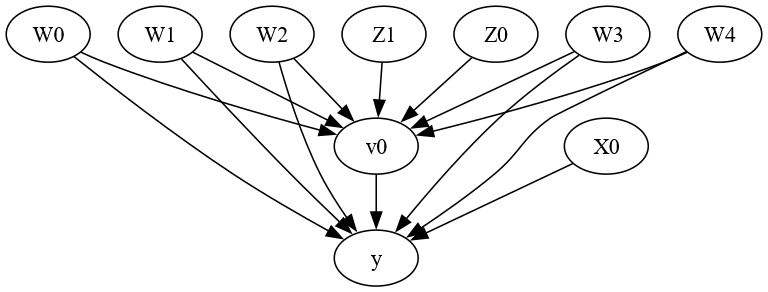

In [5]:
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [6]:
# identificación:

identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W4,W0,W1,W2,W3])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W4,W0,W1,W2,W3,U) = P(y|v0,W4,W0,W1,W2,W3)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                              -1⎤
 ⎢    d        ⎛    d          ⎞  ⎥
E⎢─────────(y)⋅⎜─────────([v₀])⎟  ⎥
 ⎣d[Z₁  Z₀]    ⎝d[Z₁  Z₀]      ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z1,Z0})
Estimand assumption 2, Exclusion: If we remove {Z1,Z0}→{v0}, then ¬({Z1,Z0}→y)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [7]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification")
print(causal_estimate)

propensity_score_stratification


c:\Users\wilso\anaconda3\envs\causal_ml\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W4,W0,W1,W2,W3])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W4,W0,W1,W2,W3,U) = P(y|v0,W4,W0,W1,W2,W3)

## Realized estimand
b: y~v0+W4+W0+W1+W2+W3
Target units: ate

## Estimate
Mean value: 9.089295420542072



In [8]:
# Causal effect on the control group (ATC)
causal_estimate_att = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification",
        target_units = "atc")
print(causal_estimate_att)
print("Causal Estimate is " + str(causal_estimate_att.value))

propensity_score_stratification


c:\Users\wilso\anaconda3\envs\causal_ml\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W4,W0,W1,W2,W3])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W4,W0,W1,W2,W3,U) = P(y|v0,W4,W0,W1,W2,W3)

## Realized estimand
b: y~v0+W4+W0+W1+W2+W3
Target units: atc

## Estimate
Mean value: 9.184486411421757

Causal Estimate is 9.184486411421757


In [9]:
# Identificar el estimando causal
identified_estimand = model.identify_effect()

# Estimar el efecto usando método IV (instrumental variable)
estimate = model.estimate_effect(
    identified_estimand,
    method_name="iv.instrumental_variable",
    method_params={
        "iv_instruments": ['Z0', 'Z1']
    }
)

# Mostrar el resultado
print("Causal Estimate is ", estimate.value)


instrumental_variable
                          IV2SLS Regression Results                           
Dep. Variable:                      y   R-squared:                       0.691
Model:                         IV2SLS   Adj. R-squared:                  0.691
Method:                     Two Stage   F-statistic:                       nan
                        Least Squares   Prob (F-statistic):                nan
Date:                Mon, 07 Jul 2025                                         
Time:                        22:47:03                                         
No. Observations:                5000                                         
Df Residuals:                    4999                                         
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
v0            18.0818      0.1

In [ ]:
# probamos diferentes métodos de estimación

methods = [
    "backdoor.linear_regression",
    "backdoor.propensity_score_matching",
    "backdoor.propensity_score_stratification",
    "backdoor.doublyrobust"
]

for method in methods:
    try:
        estimate = model.estimate_effect(identified_estimand, method_name=method)
        print(f"{method}: {estimate.value:.4f}")
    except Exception as e:
        print(f"{method}: ERROR -> {e}")


linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['X0']}
backdoor.linear_regression: 9.1040
propensity_score_matching


c:\Users\wilso\anaconda3\envs\causal_ml\Lib\site-packages\dowhy\causal_estimator.py:258: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = self._data.groupby(effect_modifier_names)
c:\Users\wilso\anaconda3\envs\causal_ml\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
c:\Users\wilso\anaconda3\envs\causal_ml\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will al

backdoor.propensity_score_matching: 9.0119
propensity_score_stratification


c:\Users\wilso\anaconda3\envs\causal_ml\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


backdoor.propensity_score_stratification: 9.0893
doublyrobust
backdoor.doublyrobust: ERROR -> doublyrobust_estimator is not an existing causal estimator.


In [17]:
import dowhy
import io
import contextlib

# Estimar el efecto causal con método backdoor.propensity_score_stratification
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.propensity_score_stratification"
)

print(f"🔍 Estimación causal base: {estimate.value:.4f}\n")

# Lista de refutadores a aplicar
refuters = [
    {
        "name": "random_common_cause",
        "params": {"num_simulations": 10}
    },
    {
        "name": "placebo_treatment_refuter",
        "params": {"num_simulations": 10, "placebo_type": "permute"}
    },
    {
        "name": "data_subset_refuter",
        "params": {"subset_fraction": 0.8, "num_simulations": 10}
    }
]

# Función para ejecutar refutadores y mostrar resumen
for ref in refuters:
    print(f"\n\n🔁 Refutador: {ref['name']}")
    f = io.StringIO()
    with contextlib.redirect_stdout(f):
        res = model.refute_estimate(
            identified_estimand,
            estimate,
            method_name=ref["name"],
            show_progress_bar=False,
            **ref["params"]
        )

    raw_output = f.getvalue().split("\n\n")  # separa por bloques
    # Mostrar primer bloque con "Regression Results"
    print("\n🧪 Resultados completos de la 1ra simulación:\n")
    shown = False
    for block in raw_output:
        if "Regression Results" in block and not shown:
            print(block)
            shown = True

    # Mostrar resumen
    print("\n📊 Síntesis del refutador:")
    print(res)

    print("\n📌 Acceso directo:")
    print(f"- Efecto estimado original: {res.estimated_effect}")
    if hasattr(res, "new_effect"):
        print(f"- Nuevo efecto simulado:    {res.new_effect}")
    if hasattr(res, "p_value"):
        print(f"- p-valor refutador:        {res.p_value}")
    else:
        print("- p-valor refutador:        No disponible para este refutador.")


propensity_score_stratification


c:\Users\wilso\anaconda3\envs\causal_ml\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


🔍 Estimación causal base: 9.0893



🔁 Refutador: random_common_cause


c:\Users\wilso\anaconda3\envs\causal_ml\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wilso\anaconda3\envs\causal_ml\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wilso\anaconda3\envs\causal_ml\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wilso\anaconda3\envs\causal_ml\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d arr


🧪 Resultados completos de la 1ra simulación:


📊 Síntesis del refutador:
Refute: Add a random common cause
Estimated effect:9.089295420542072
New effect:9.048582432924968
p value:0.3433835762413042


📌 Acceso directo:
- Efecto estimado original: 9.089295420542072
- Nuevo efecto simulado:    9.048582432924968
- p-valor refutador:        No disponible para este refutador.


🔁 Refutador: placebo_treatment_refuter


c:\Users\wilso\anaconda3\envs\causal_ml\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wilso\anaconda3\envs\causal_ml\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wilso\anaconda3\envs\causal_ml\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wilso\anaconda3\envs\causal_ml\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d arr


🧪 Resultados completos de la 1ra simulación:


📊 Síntesis del refutador:
Refute: Use a Placebo Treatment
Estimated effect:9.089295420542072
New effect:0.06780615760983352
p value:0.37017137346714823


📌 Acceso directo:
- Efecto estimado original: 9.089295420542072
- Nuevo efecto simulado:    0.06780615760983352
- p-valor refutador:        No disponible para este refutador.


🔁 Refutador: data_subset_refuter


c:\Users\wilso\anaconda3\envs\causal_ml\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wilso\anaconda3\envs\causal_ml\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wilso\anaconda3\envs\causal_ml\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wilso\anaconda3\envs\causal_ml\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d arr


🧪 Resultados completos de la 1ra simulación:


📊 Síntesis del refutador:
Refute: Use a subset of data
Estimated effect:9.089295420542072
New effect:9.211057374575294
p value:0.15775078335319898


📌 Acceso directo:
- Efecto estimado original: 9.089295420542072
- Nuevo efecto simulado:    9.211057374575294
- p-valor refutador:        No disponible para este refutador.
